Task 5: Half-wavelength Slab
===

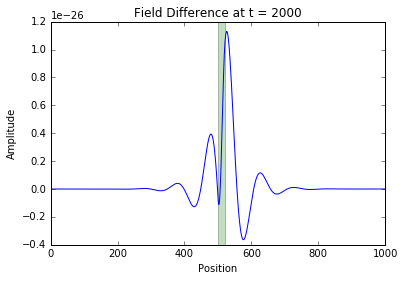

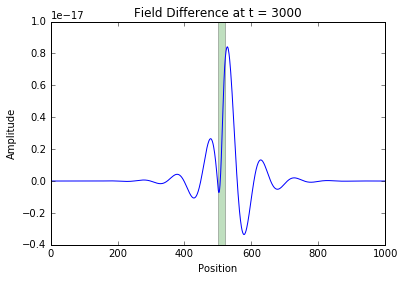

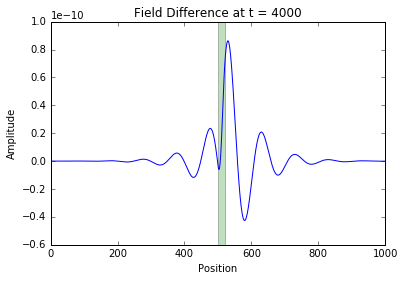

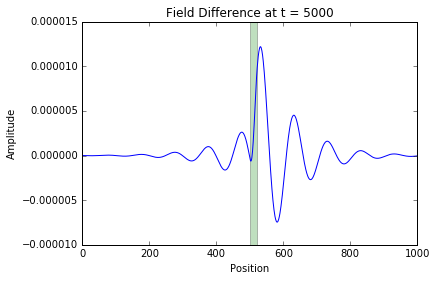

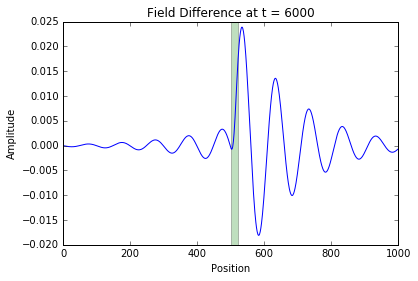

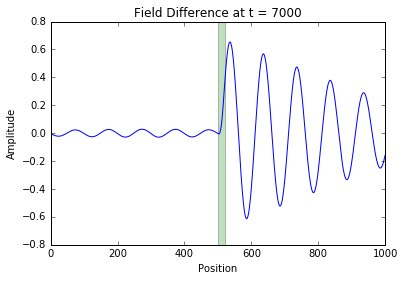

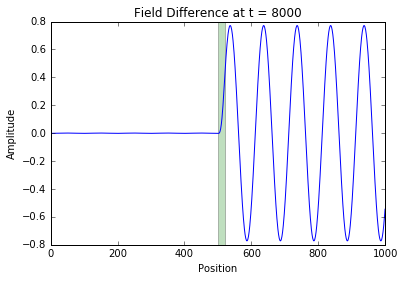

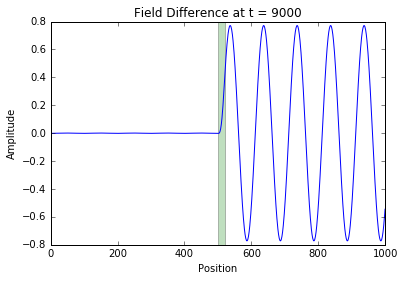

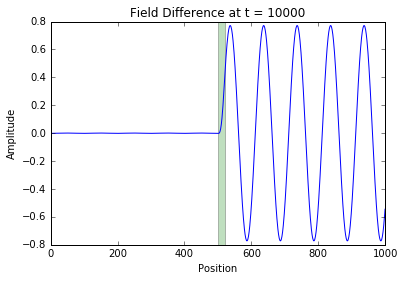

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
import math as m

fignum = 0

#some toggles for the plot
show_field_difference = 1
show_efield_and_refefield = 0
show_efield_only = 0

nx = 1000
imp0 = 337.0

wavelength = int(nx/10)
factor = 2
epshost = 1
epsmat = 5

nhost = np.sqrt(epshost)
nmat = np.sqrt(epsmat)

scale = nhost/nmat
thickness = wavelength/factor

#rescale thickness and nmat
nmat = ((thickness*nhost)/int(scale*thickness))
thickness = int(scale*wavelength/factor)

epsmat = nmat**2
eps = np.zeros(nx)
eps[:] = epshost
eps[int(nx/2):int(nx/2+thickness)] = epsmat
        
#need to show a version of the efield without the material
#everything that starts with "ref" is used for the reference
refeps= np.zeros(nx)
refeps[:] = epshost


srcori = int(nx/10)              #source origin
srcwid = wavelength*3.0*np.sqrt(max(epshost,epsmat))
srcdel = 10*srcwid              #source delay
nt = int(4*nx+srcdel)

ez = np.zeros(nx)
hy = np.zeros(nx)
x = np.arange(0,nx-1,1)

refez = np.zeros(nx)
refhy = np.zeros(nx)

lc = 1/np.sqrt(eps[0])
la = (lc-1)/(lc+1)
lb = 2/(lc + 1)

rc = 1/np.sqrt(eps[-1])
ra = (rc-1)/(rc+1)
rb = 2/(rc + 1)

reflc = 1/np.sqrt(eps[0])
refla = (lc-1)/(lc+1)
reflb = 2/(lc + 1)

refrc = 1/np.sqrt(eps[-1])
refra = (rc-1)/(rc+1)
refrb = 2/(rc + 1)

hwnp10, ewnp10 = 0,0 # W | ^{n+1} _{0}
hwnm11, ewnm11 = 0,0 # W | ^{n-1} _{1}
hwnp11, ewnp11 = 0,0 # W | ^{n+1} _{1}
hwnm10, ewnm10 = 0,0 # W | ^{n-1} _{0}
hwn0  , ewn0   = 0,0 # W | ^{n  } _{0}
hwn1  , ewn1   = 0,0 # W | ^{n  } _{1}

hwnp1im1, ewnp1im1 = 0,0 # W | ^{n+1} _{i-1}
hwnm1i  , ewnm1i   = 0,0 # W | ^{n-1} _{i  }
hwnp1i  , ewnp1i   = 0,0 # W | ^{n+1} _{i  }
hwnm1im1, ewnm1im1 = 0,0 # W | ^{n-1} _{i-1}
hwnim1  , ewnim1   = 0,0 # W | ^{n  } _{i-1}
hwni    , ewni     = 0,0 # W | ^{n  } _{i  }


refhwnp10, refewnp10 = 0,0 # W | ^{n+1} _{0}
refhwnm11, refewnm11 = 0,0 # W | ^{n-1} _{1}
refhwnp11, refewnp11 = 0,0 # W | ^{n+1} _{1}
refhwnm10, refewnm10 = 0,0 # W | ^{n-1} _{0}
refhwn0  , refewn0   = 0,0 # W | ^{n  } _{0}
refhwn1  , refewn1   = 0,0 # W | ^{n  } _{1}

refhwnp1im1, refewnp1im1 = 0,0 # W | ^{n+1} _{i-1}
refhwnm1i  , refewnm1i   = 0,0 # W | ^{n-1} _{i  }
refhwnp1i  , refewnp1i   = 0,0 # W | ^{n+1} _{i  }
refhwnm1im1, refewnm1im1 = 0,0 # W | ^{n-1} _{i-1}
refhwnim1  , refewnim1   = 0,0 # W | ^{n  } _{i-1}
refhwni    , refewni     = 0,0 # W | ^{n  } _{i  }

amp = 1.0
for dt in range(0,nt):
    ######################
    #Magnetic field
    ######################
    hy[x] = hy[x] + (ez[x+1] - ez[x])/imp0

    #abc at left
    hwnp11 = hy[1]
    hwnp10 = -hwnm11 + la*(hwnp11 + hwnm10) + lb*(hwn0 + hwn1)
    hy[0] = hwnp10
    hwnm11, hwnm10 = hwn1, hwn0
    hwn1, hwn0  = hwnp11, hwnp10
    
    #abc at right
    hwnp1im1 = hy[-2]
    hwnp1i = - hwnm1im1 + ra*(hwnp1im1 + hwnm1i) + rb*(hwnp1i + hwnim1)
    hy[-1] = hwnp1i
    hwnm1i, hwnm1im1 = hwni, hwnim1
    hwni, hwnim1  = hwnp1i, hwnp1im1
    
    ######################
    #Electric field
    ######################
    ez[x+1] = ez[x+1] + (hy[x+1]-hy[x])*imp0/eps[x+1]
    
    #create a source that is initially gaussian and then becomes sine
    if (dt > srcdel):
        amp = 1    
    else:
        amp = m.exp(-((dt-srcdel)*(dt-srcdel))/(srcwid*srcwid))
    ez[srcori] += amp/np.sqrt(epshost)*np.sin(2*np.pi*dt*lc/wavelength)

    #abc at left
    ewnp11 = ez[1]
    ewnp10 = -ewnm11 + la*(ewnp11 + ewnm10) + lb*(ewn0 + ewn1)
    ez[0] = ewnp10
    ewnm11, ewnm10 = ewn1, ewn0
    ewn1, ewn0  = ewnp11, ewnp10
    
    #abc at right
    ewnp1im1 = ez[-2]
    ewnp1i = - ewnm1im1 + ra*(ewnp1im1 + ewnm1i) + rb*(ewnp1i + ewnim1)
    ez[-1] = ewnp1i
    ewnm1i, ewnm1im1 = ewni, ewnim1
    ewni, ewnim1  = ewnp1i, ewnp1im1

    ######################
    #Reference
    ######################

    ######################
    #Magnetic field
    ######################
    refhy[x] = refhy[x] + (refez[x+1] - refez[x])/imp0

    #abc at left
    refhwnp11 = refhy[1]
    refhwnp10 = -refhwnm11 + refla*(refhwnp11 + refhwnm10) + reflb*(refhwn0 + refhwn1)
    refhy[0] = refhwnp10
    refhwnm11, refhwnm10 = refhwn1, refhwn0
    refhwn1, refhwn0  = refhwnp11, refhwnp10
    
    #abc at right
    refhwnp1im1 = refhy[-2]
    refhwnp1i = - refhwnm1im1 + refra*(refhwnp1im1 + refhwnm1i) + refrb*(refhwnp1i + refhwnim1)
    refhy[-1] = refhwnp1i
    refhwnm1i, refhwnm1im1 = refhwni, refhwnim1
    refhwni, refhwnim1  = refhwnp1i, refhwnp1im1
    
    ######################
    #Electric field
    ######################
    refez[x+1] = refez[x+1] + (refhy[x+1]-refhy[x])*imp0/refeps[x+1]
    
    if (dt > srcdel):
        amp = 1    
    else:
        amp = m.exp(-((dt-srcdel)*(dt-srcdel))/(srcwid*srcwid))
    refez[srcori] += amp/np.sqrt(epshost)*np.sin(2*np.pi*dt*lc/wavelength)

    #abc at left
    refewnp11 = refez[1]
    refewnp10 = -refewnm11 + refla*(refewnp11 + refewnm10) + reflb*(refewn0 + refewn1)
    refez[0] = refewnp10
    refewnm11, refewnm10 = refewn1, refewn0
    refewn1, refewn0  = refewnp11, refewnp10
    
    #abc at right
    refewnp1im1 = refez[-2]
    refewnp1i = - refewnm1im1 + refra*(refewnp1im1 + refewnm1i) + refrb*(refewnp1i + refewnim1)
    refez[-1] = refewnp1i
    refewnm1i, refewnm1im1 = refewni, refewnim1
    refewni, refewnim1  = refewnp1i, refewnp1im1

    plt.hold(True)
    if (dt % 1000 == 0 and dt > 1000):
#    if (dt == srcdel+srcwid+(0.75*nx)):
        fignum = fignum + 1
        plt.figure(fignum)
        plt.xlabel("Position")
        plt.ylabel("Amplitude")
        plt.axvspan(nx/2, thickness+nx/2, facecolor='g', alpha=0.25)

        if (show_field_difference):
            plt.title("Field Difference at t = "+ str(dt))        
            plt.plot(ez-refez, label="E-field")        
        elif (show_efield_and_refefield):
            plt.title("Field at t = "+ str(dt))        
            plt.plot(ez, label="E-field")                
            plt.plot(refez, label="Ref. E-field")                
            plt.legend()
        elif (show_efield_only):
            plt.title("Field at t = "+ str(dt))        
            plt.plot(ez, label="E-field")                
        
#        plt.plot(hy*imp0, label="H-field")

